# Import

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Reading files

In [5]:
#folder="/home/gorbunov8a/CODE/test_case/"
Rl = 160; N=512
folder = "/home/gorbunov8a/data/shell_to_shell/Rl160_N512/old/nu10E-2/"
file_type = "shell_to_shell_transfer_ite="
nb = 5

file = folder + file_type + "%06d" % nb + ".table"
file_data = []
for line in open(file) :
    temp_array_line = []
    if line[0] == '#' :          #skip commented lines
        continue
    else :
        temp_array_line=list(map(float, line.split( )))
        file_data.append(temp_array_line)  
T = np.array(file_data)
del file_data

In [6]:
# read the spectrum
file_type = "vel_spec_kstar_ite="
nb = 0

file = folder + file_type + "%06d" % nb + ".table"
file_data = []
for line in open(file) :
    temp_array_line = []
    if line[0] == '#' :          #skip commented lines
        continue
    else :
        temp_array_line=list(map(float, line.split( )))
        file_data.append(temp_array_line)  
spec_table = np.array(file_data)
k = spec_table[:,0]
nb_of_modes = spec_table[:,1]
Ek = spec_table[:,2]
del file_data

# Parameters

In [7]:
# PARAMETERS
nu = 0.01
pi = np.pi
lmbda = 0.161345 
eta = 0.006436  
L = 2.2
dissipation_rate = 600  

t0=dissipation_rate**(-1.0/3.0)*L**(2.0/3.0) #large scale eddy-turnover time
spatial_scales = np.array([L, lmbda, eta])
wn_scales = 2.0*np.pi/spatial_scales

# Plot appereance

In [8]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rc('axes', prop_cycle=cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors)))
plt.rc('axes', labelsize=12)  
plt.rc('axes', titlesize=12)  
plt.rc('legend', fontsize=10)

# Energy spectrum

<IPython.core.display.Javascript object>


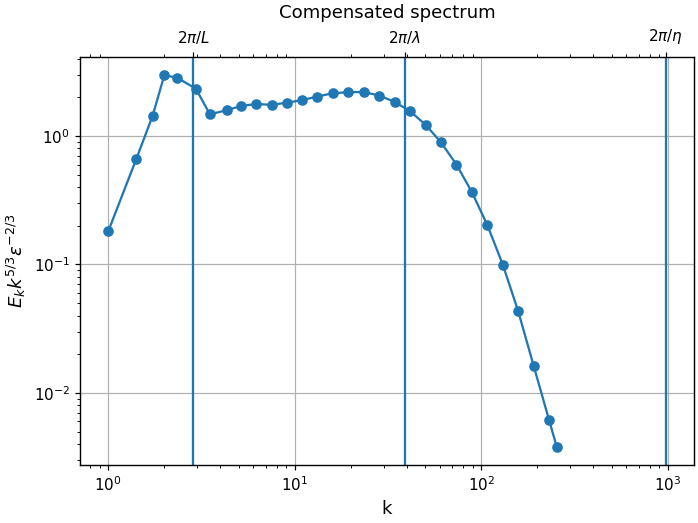

In [9]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(k, Ek*k**(5.0/3.0)*dissipation_rate**(-2.0/3.0), '-o')
ax.set(xscale='log', yscale='log', xlabel='k', ylabel=r'$E_k k^{5/3} \epsilon^{-2/3}$', title='Compensated spectrum'); ax.grid()

vertical_lines=wn_scales
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()

# Dissipation spectrum

<IPython.core.display.Javascript object>


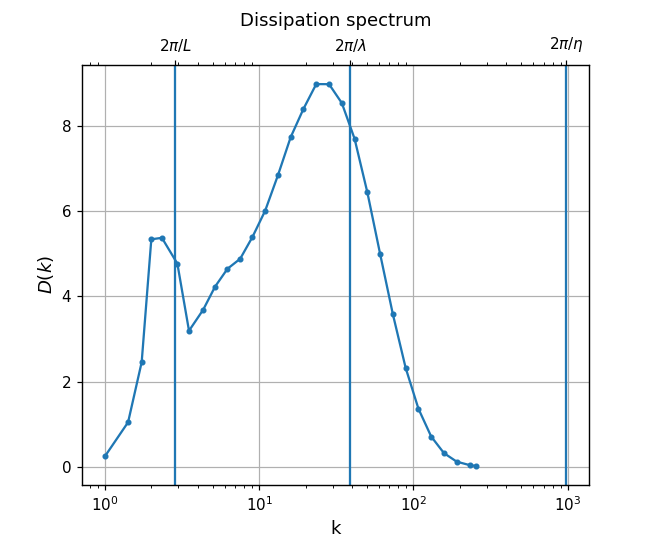

In [10]:
fig, ax = plt.subplots(figsize=(6,5))

total_transfer = np.sum(T, axis=0)
#total_tansfer = total_transfer*4.0*np.pi*(k**2.0)/nb_of_modes
ax.plot(k, 2.0*nu*Ek*k**(2.0), '.-')
ax.set(xlabel='k', ylabel=r'$D(k)$', title='Dissipation spectrum'); ax.grid()
ax.set(xscale='log', yscale='linear')
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='linear', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()

# Energy transfer spectrum

In [ ]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)

total_transfer1 = np.sum(T, axis=0)
total_transfer2 = -np.sum(T, axis=1)
total_transfer = (total_transfer1 + total_transfer2)
ax.plot(k, 2.0*nu*Ek*k**(2.0), '.-', label='$D(k)$')
ax.plot(k, total_transfer, '.-', label=r'$T(k)$')
ax.plot(k, total_transfer-2.0*nu*Ek*k**(2.0), '.-', label=r'$T(k)-D(k)$')
ax.set(xlabel='k', ylabel=r'$T(k)$', title='Total energy transfer'); ax.grid()
ax.set(xscale='log', yscale='linear')
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='linear', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


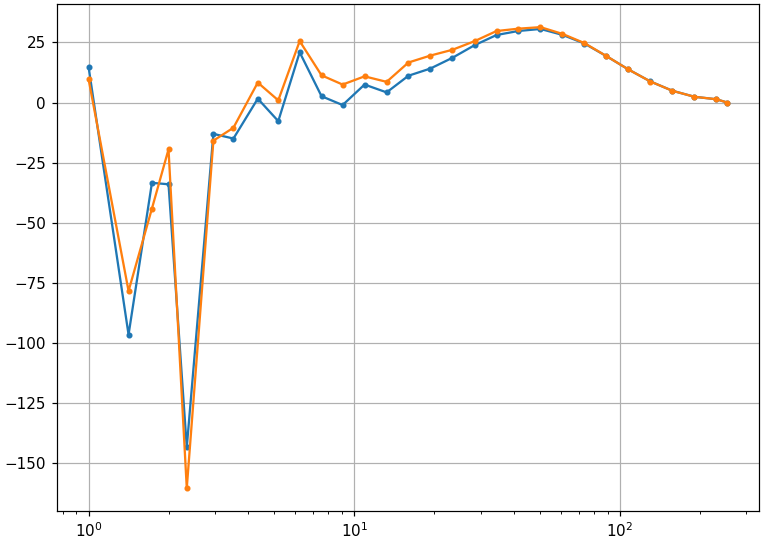

In [11]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)

total_transfer1 = np.zeros_like(k)
total_transfer2 = np.zeros_like(k)
for ik in list(range(k.shape[0])) :
#    total_transfer1[ik] = np.trapz(T[:,ik], x=k)
#    total_transfer2[ik] = np.trapz(T[ik,:], x=k)
    total_transfer1[ik] = np.sum(T[:,ik])
    total_transfer2[ik] = np.sum(T[ik,:])
ax.plot(k, total_transfer1,'.-')
ax.plot(k, -total_transfer2,'.-')
#ax.plot(k, total_transfer-2.0*nu*Ek*k**(2.0), '.-', label=r'$T(k)-D(k)$')
ax.set(xscale='log')
ax.grid()

In [ ]:
np.trapz(total_transfer1, x=k)

In [12]:
np.sum(total_transfer1)

-33.30080117764951

In [13]:
np.sum(T)

-33.30080117764942

In [14]:
4.0*np.pi*(k**2.0)/nb_of_modes

array([2.09439531, 2.0943953 , 4.71238943, 8.37758125, 1.4369156 ,
       2.60551097, 1.20984219, 1.27038826, 1.11626766, 0.85728745,
       0.71946409, 0.62033185, 0.4755804 , 0.40792191, 0.3351237 ,
       0.27588357, 0.22594264, 0.18745371, 0.15573981, 0.12870814,
       0.10600189, 0.08773159, 0.07250171, 0.05997494, 0.04950132,
       0.04093401, 0.03382156, 0.02795842, 0.02310124, 0.2293975 ])

In [15]:
#total dissipation rate (epsilon)
np.trapz(2.0*nu*Ek*k**(2.0), x=k)

604.8228922674135

In [16]:
np.sum(2.0*nu*Ek*k**(2.0))

128.3765032056053

# Energy flux

<IPython.core.display.Javascript object>


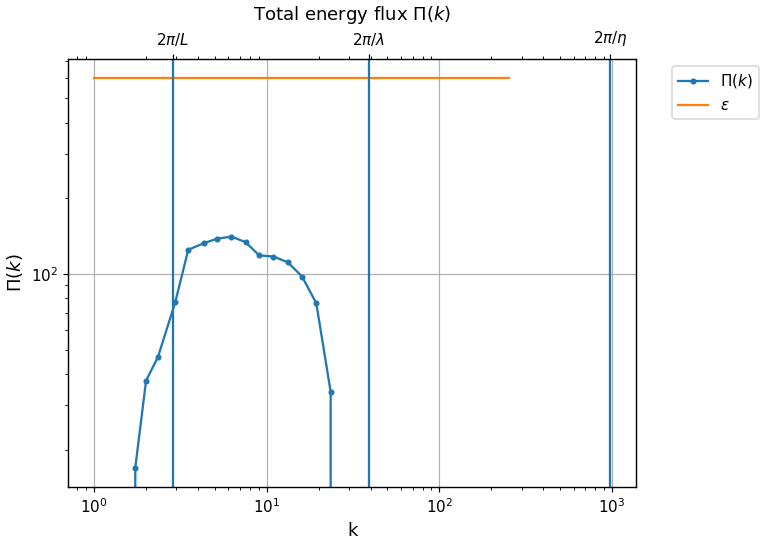

In [17]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(7,5))
flux = np.zeros(shape=k.shape[0], dtype=float) 
for ik in list(range(k.shape[0])) :
    flux[ik] = -np.trapz(total_transfer1[:ik], x=k[:ik])
ax.plot(k, flux, '.-', label=r'$\Pi(k)$')
ax.plot(k, dissipation_rate*np.ones_like(k), '-', label=r'$\epsilon$')
ax.set(xlabel='k', ylabel=r'$\Pi(k)$', title=r'Total energy flux $\Pi(k)$'); ax.grid()
ax.set(xscale='log', yscale='log')
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot shell-to-shell energy transfer matrix

<IPython.core.display.Javascript object>


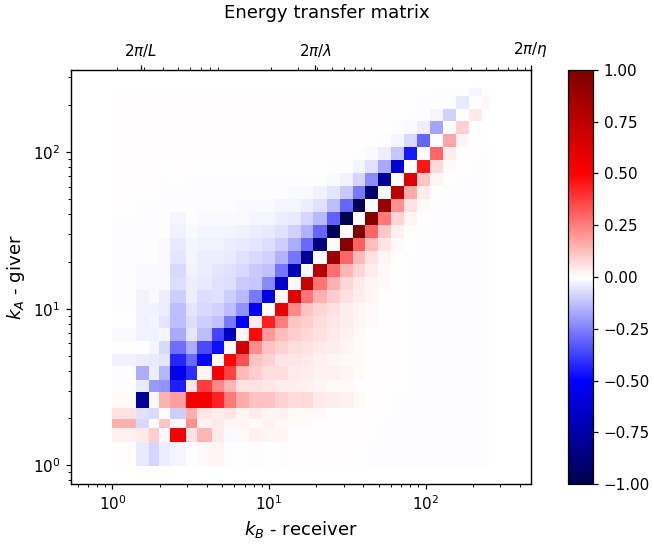

In [18]:
fig, ax = plt.subplots(figsize=(6,5),constrained_layout=True)

im = ax.pcolormesh(k, k, T/np.max(abs(T)), cmap='seismic', vmin=-1, vmax=1)
ax.set(xlabel=r'$k_B$ - receiver', ylabel=r'$k_A$ - giver', xscale='log', yscale='log')
ax.set_aspect('equal', 'datalim')
fig.colorbar(im)
fig.suptitle('Energy transfer matrix') 
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()

In [19]:
np.sum(np.outer(np.diff(k),np.diff(k))*T[:-1, :-1])

-300.7427972048904

In [20]:
np.max(T)

75.133262

In [21]:
np.diff(k).shape

(29,)

In [22]:
k.shape

(30,)

# Diagonals

<IPython.core.display.Javascript object>


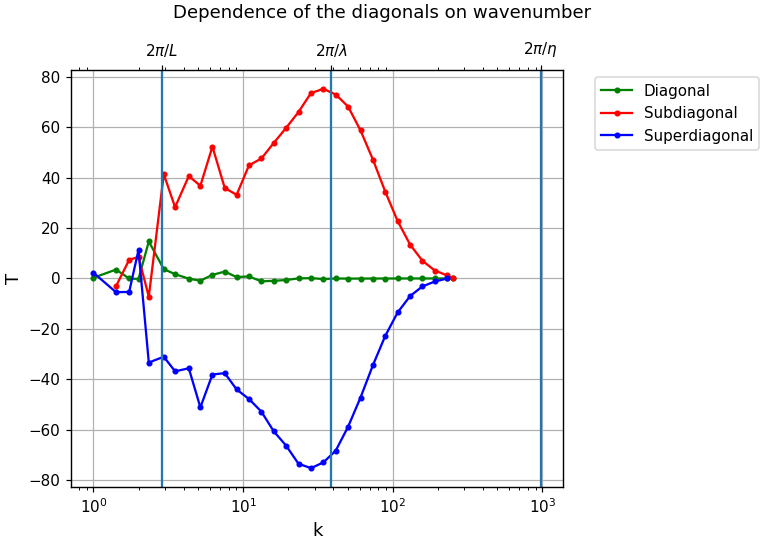

In [23]:
diag_center = T.diagonal(offset=0, axis1=0, axis2=1) #green
diag_plus = T.diagonal(offset=1, axis1=0, axis2=1)   #red
diag_minus = T.diagonal(offset=-1, axis1=0, axis2=1) #blue

fig, ax = plt.subplots(figsize=(7,5),constrained_layout=True)
ax.plot(k, diag_center, 'g.-', label='Diagonal')
ax.plot(k[1:], diag_plus, 'r.-', label='Subdiagonal')
ax.plot(k[:-1], diag_minus, 'b.-', label='Superdiagonal')
ax.set(ylabel='T')
ax.set(xlabel='k')
ax.grid()
#ax.set(ylim=[-0.5,0.3])
ax.set(xscale='log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle('Dependence of the diagonals on wavenumber') 
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='linear', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()
plt.show()

# Forcing band

<IPython.core.display.Javascript object>


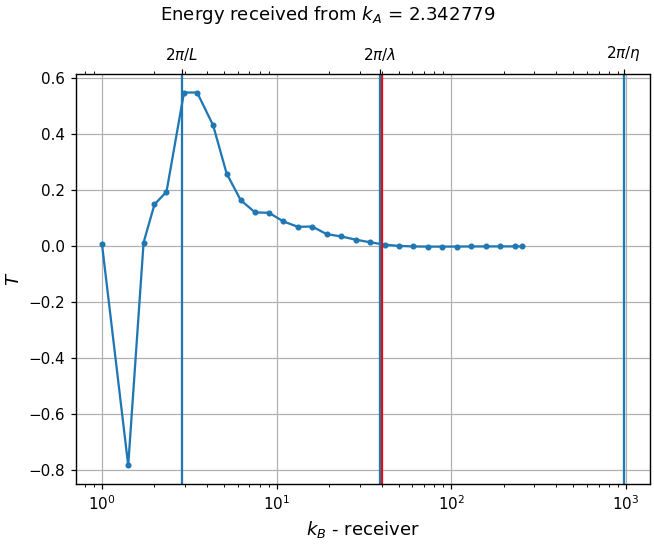

In [24]:
fig, ax = plt.subplots(figsize=(6,5),constrained_layout=True)
ikf = 4
ax.plot(k, T[ikf, :]/np.max(abs(T)),  '.-')
ax.set(xlabel=r'$k_B$ - receiver', ylabel=r'$T$', xscale='log', yscale='linear'); ax.grid()
fig.suptitle(r'Energy received from $k_A$ = %f' % k[ikf]) 
ax.axvline(x=40, color='red')
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='linear', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()